<center><h1><font color="orange">Black Scholes Data Generator:</font></h1></center>

<h4>Imports:</h4>

In [1]:
import numpy as np
from math import exp, log, pi, sqrt
from scipy.stats import norm

<h4>Data Generator:</h4>
<p>Create random strike, spot, maturity time, rate, volatility, and dividend data to generate price of a call option from Black-Scholes. We calculate Black-Scholes value of a call option as 
    
    $$d_1 = \left(\log{\frac{S}{K}}\right)+\frac{\left((r-d)+\sigma*\frac{\sigma}{2}\right)*T)}{(\sigma*\sqrt{T})} $$
    $$d_2 = d_1 - \sigma*\sqrt{t}$$
    $$ v = S*e^{\frac{-d}{T}}*\text{norm.cdf}\left(d_1\right) - K*e^{-rT}*\text{norm.cdf}\left(d_2\right)$$


</p>

In [189]:
class BlackScholes:
    def input_generator(self,num_samples): 
        '''
        Generate random strike/spot, time (in days), rate, volatility (sigma), and dividend data to run 
        Black-Scholes on for n sampels
        '''
        S = np.random.uniform(0.00,500,num_samples) #Random Spot Price
        #Ensure that our Strike/Spot (K/S) is between 0.95 and 1.05 
        g = np.random.uniform(0.95,1.05,num_samples)
        K = S/g 
        T = np.random.uniform(0, 365*8, num_samples) # time until expiration in days
        rate = np.random.uniform(-0.2, 0.2, num_samples)# Annualized risk free rate
        sigma = np.random.exponential(0.10, 2.0, num_samples)  #Volatility of daily returns             
        dividend = np.random.uniform(0.0, 0.2, num_samples) # Dividend yield
        X = np.asmatrix([S,K,T,sigma,rate,dividend]).transpose()
        return X
    
    def getData(self,num_samples,write=False): 
        ''' 
        Get Random inputs X and prices Y
        '''
        X = self.input_generator(num_samples)
        Y = self.generate_prices(X)
        X = np.asarray(X)
        if write:
            with open('data.csv','w') as file:
                file.write('K/S,T,sigma,rate,dividend,v\n') 
                for i in range(X.shape[0]): 
                    file.write('{},{},{},{},{},{}\n'.format(X[i][0], X[i][1], X[i][2], X[i][3],X[i][4], Y[i]))
                file.close()
        return X,Y
    
    def generate_prices(self,X): 
        '''
        Vectorization to call the vanilla call price from the input
        '''
        return np.apply_along_axis(self.vanilla_call_price, axis=1, arr=X)
    

    def vanilla_call_price(self,X): 
        '''
        Calculate Vanialla Call Price
        '''

        #Get Parameters from X
        S = X[0,0]
        K = X[0,1]
        T = X[0,2]
        sigma = X[0,3]
        r = X[0,4]
        d = X[0,5]
        

        #Black Scholes Formula Calculation
        d1 = (log(float(S)/K)+((r-d)+sigma*sigma/2.)*T/365)/(sigma*sqrt(T))
        d2 = d1-sigma*sqrt(T)
        return S*exp(-d*T/365)*norm.cdf(d1)-K*exp(-r*T/365)*norm.cdf(d2)

In [125]:
b = BlackScholes()
trainX,trainY = b.getData(20000)

In [127]:
testX,testY = BlackScholes().getData(5000)

<h4>Models:</h4>

In [183]:
from keras.models import Sequential
from keras.layers import Dense,Activation

<h4>Model 1:</h4>

In [129]:
model = Sequential()
model.add(Dense(64,input_dim=X.shape[1],activation='tanh'))
model.add(Dense(1,activation='linear'))
model.compile(optimizer='adam',loss='mse',metrics=['mse'])

In [131]:
model.fit(trainX,trainY,epochs=100, batch_size=32)

Epoch 1/100
20000/20000 [==============================] - 0s 23us/step - loss: 929.8000 - mean_squared_error: 929.8000
Epoch 2/100
20000/20000 [==============================] - 0s 22us/step - loss: 891.6509 - mean_squared_error: 891.6509
Epoch 3/100
20000/20000 [==============================] - 0s 22us/step - loss: 858.4084 - mean_squared_error: 858.4084
Epoch 4/100
20000/20000 [==============================] - 0s 22us/step - loss: 818.8868 - mean_squared_error: 818.8868
Epoch 5/100
20000/20000 [==============================] - 0s 23us/step - loss: 806.6795 - mean_squared_error: 806.6795
Epoch 6/100
20000/20000 [==============================] - 0s 22us/step - loss: 759.2286 - mean_squared_error: 759.2286
Epoch 7/100
20000/20000 [==============================] - 0s 22us/step - loss: 723.8397 - mean_squared_error: 723.8397
Epoch 8/100
20000/20000 [==============================] - 0s 23us/step - loss: 691.4145 - mean_squared_error: 691.4145
Epoch 9/100
20000/20000 [===============

20000/20000 [==============================] - 0s 24us/step - loss: 329.4639 - mean_squared_error: 329.4639
Epoch 69/100
20000/20000 [==============================] - 0s 24us/step - loss: 344.1618 - mean_squared_error: 344.1618
Epoch 70/100
20000/20000 [==============================] - 0s 24us/step - loss: 341.2300 - mean_squared_error: 341.2300
Epoch 71/100
20000/20000 [==============================] - 0s 24us/step - loss: 359.0397 - mean_squared_error: 359.0397
Epoch 72/100
20000/20000 [==============================] - 0s 24us/step - loss: 335.3946 - mean_squared_error: 335.3946
Epoch 73/100
20000/20000 [==============================] - 0s 24us/step - loss: 362.1892 - mean_squared_error: 362.1892
Epoch 74/100
20000/20000 [==============================] - 0s 24us/step - loss: 335.0117 - mean_squared_error: 335.0117
Epoch 75/100
20000/20000 [==============================] - 0s 24us/step - loss: 327.3455 - mean_squared_error: 327.3455
Epoch 76/100
20000/20000 [===================

In [132]:
preds = model.predict(testX)

In [136]:
model.evaluate(testX,testY)

5000/5000 [==============================] - 0s 47us/step


[308.02887568359375, 308.02887568359375]

In [143]:
model = Sequential()
model.add(Dense(300,input_dim=X.shape[1],activation='tanh'))
model.add(Dense(300, activation='tanh'))
model.add(Dense(300,activation='tanh'))
model.add(Dense(1,activation='linear'))
model.compile(optimizer='adam',loss='mse',metrics=['mse'])

In [144]:
model.fit(X,Y,batch_size=64,epochs=150)

Epoch 1/150
20000/20000 [==============================] - 1s 61us/step - loss: 4998.1149 - mean_squared_error: 4998.1149
Epoch 2/150
20000/20000 [==============================] - 1s 33us/step - loss: 2053.8330 - mean_squared_error: 2053.8330
Epoch 3/150
20000/20000 [==============================] - 1s 33us/step - loss: 1675.6834 - mean_squared_error: 1675.6834
Epoch 4/150
20000/20000 [==============================] - 1s 33us/step - loss: 1589.3294 - mean_squared_error: 1589.3294
Epoch 5/150
20000/20000 [==============================] - 1s 33us/step - loss: 1552.8892 - mean_squared_error: 1552.8892
Epoch 6/150
20000/20000 [==============================] - 1s 33us/step - loss: 1473.7186 - mean_squared_error: 1473.7186
Epoch 7/150
20000/20000 [==============================] - 1s 34us/step - loss: 1332.5646 - mean_squared_error: 1332.5646
Epoch 8/150
20000/20000 [==============================] - 1s 33us/step - loss: 1269.8888 - mean_squared_error: 1269.8888
Epoch 9/150
20000/20000 

20000/20000 [==============================] - 1s 33us/step - loss: 131.3293 - mean_squared_error: 131.3293
Epoch 69/150
20000/20000 [==============================] - 1s 33us/step - loss: 157.3706 - mean_squared_error: 157.3706
Epoch 70/150
20000/20000 [==============================] - 1s 33us/step - loss: 130.9802 - mean_squared_error: 130.9802
Epoch 71/150
20000/20000 [==============================] - 1s 33us/step - loss: 134.7889 - mean_squared_error: 134.7889
Epoch 72/150
20000/20000 [==============================] - 1s 33us/step - loss: 127.9161 - mean_squared_error: 127.9161
Epoch 73/150
20000/20000 [==============================] - 1s 33us/step - loss: 114.6145 - mean_squared_error: 114.6145
Epoch 74/150
20000/20000 [==============================] - 1s 33us/step - loss: 127.4622 - mean_squared_error: 127.4622
Epoch 75/150
20000/20000 [==============================] - 1s 34us/step - loss: 172.2264 - mean_squared_error: 172.2264
Epoch 76/150
20000/20000 [===================

20000/20000 [==============================] - 1s 36us/step - loss: 83.3492 - mean_squared_error: 83.3492
Epoch 136/150
20000/20000 [==============================] - 1s 34us/step - loss: 90.1052 - mean_squared_error: 90.1052
Epoch 137/150
20000/20000 [==============================] - 1s 36us/step - loss: 81.7599 - mean_squared_error: 81.7599
Epoch 138/150
20000/20000 [==============================] - 1s 35us/step - loss: 88.0132 - mean_squared_error: 88.0132
Epoch 139/150
20000/20000 [==============================] - 1s 37us/step - loss: 87.2695 - mean_squared_error: 87.2695
Epoch 140/150
20000/20000 [==============================] - 1s 36us/step - loss: 75.8790 - mean_squared_error: 75.8790
Epoch 141/150
20000/20000 [==============================] - 1s 36us/step - loss: 74.4779 - mean_squared_error: 74.4779
Epoch 142/150
20000/20000 [==============================] - 1s 35us/step - loss: 75.6780 - mean_squared_error: 75.6780
Epoch 143/150
20000/20000 [===========================

In [145]:
model.evaluate(testX,testY)

5000/5000 [==============================] - 0s 63us/step


[51.2220770324707, 51.2220770324707]

In [146]:
preds = model.predict(testX)

Feature ranking:
1. feature 0 (0.636909)
2. feature 5 (0.128762)
3. feature 2 (0.123884)
4. feature 1 (0.106715)
5. feature 3 (0.002899)
6. feature 4 (0.000831)


(-1, 6)

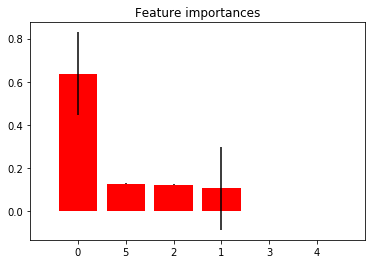

In [195]:
from sklearn.ensemble import RandomForestRegressor
import matplotlib.pyplot as plt
rfr = RandomForestRegressor(n_estimators=20)
rfr.fit(X,Y)
importances = rfr.feature_importances_
std = np.std([tree.feature_importances_ for tree in rfr.estimators_],
             axis=0)
indices = np.argsort(importances)[::-1]

# Print the feature ranking
print("Feature ranking:")

for f in range(X.shape[1]):
    print("%d. feature %d (%f)" % (f + 1, indices[f], importances[indices[f]]))

# Plot the feature importances of the forest
plt.figure()
plt.title("Feature importances")
plt.bar(range(X.shape[1]), importances[indices],
       color="r", yerr=std[indices], align="center")
plt.xticks(range(X.shape[1]), indices)
plt.xlim([-1, X.shape[1]])

In [192]:
rfr.predict(testX)

array([161.17719827,  58.67297563,  30.53892277, ...,  72.06615341,
       201.74208062,  28.54392923])

In [193]:
testY

array([159.0415273 ,  60.93283996,  29.3640982 , ...,  76.69543475,
       201.30210005,  29.67204858])